170508288/170498071 [==============================] - 6s 0us/step


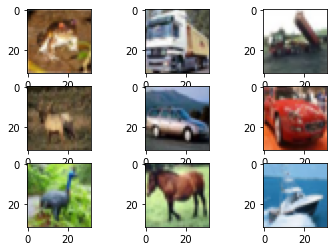

In [1]:
from keras.datasets import cifar10 #load du lieu cifar100
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(X_train[i])
plt.show()


In [2]:
X = X_test
Y = y_test
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train = X_train.astype('float')
X_test = X_test.astype('float')
X_train/=255
X_test/=255

In [3]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
model = Sequential()
model.add(Dense(512,activation='relu',input_shape = (X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [5]:
from tensorflow.keras.optimizers import SGD, Adam
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
history = model.fit(X_train,y_train,batch_size=128,epochs=100,verbose=1,validation_data=(X_test,y_test))
#model.fit(đối tượng 1, đối tượng 2, giới hạn dữ liệu học, số lần học, đầu ra (hiển thị) (như thanh bên dưới),đối tượng học )

Epoch 1/100
391/391 [==============================] - 7s 9ms/step - loss: 1.9426 - accuracy: 0.2893 - val_loss: 1.7591 - val_accuracy: 0.3650
Epoch 2/100
391/391 [==============================] - 3s 9ms/step - loss: 1.7976 - accuracy: 0.3480 - val_loss: 1.6905 - val_accuracy: 0.3997
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 1.7411 - accuracy: 0.3681 - val_loss: 1.6246 - val_accuracy: 0.4236
Epoch 4/100
391/391 [==============================] - 3s 8ms/step - loss: 1.7007 - accuracy: 0.3810 - val_loss: 1.6186 - val_accuracy: 0.4221
Epoch 5/100
391/391 [==============================] - 3s 8ms/step - loss: 1.6634 - accuracy: 0.3991 - val_loss: 1.5957 - val_accuracy: 0.4392
Epoch 6/100
391/391 [==============================] - 3s 8ms/step - loss: 1.6474 - accuracy: 0.4027 - val_loss: 1.6078 - val_accuracy: 0.4303
Epoch 7/100
391/391 [==============================] - 3s 8ms/step - loss: 1.6232 - accuracy: 0.4113 - val_loss: 1.5725 - val_accuracy: 0.4423

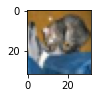

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


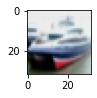

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


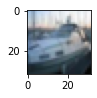

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


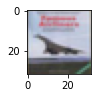

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


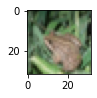

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


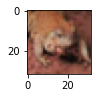

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


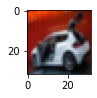

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


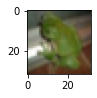

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


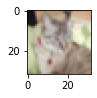

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
import numpy as np
y_pred=model.predict(X_test)
for i in range(9):
  plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(X[i])
  plt.show()
  print(np.round(y_pred[i]))

313/313 [==============================] - 1s 4ms/step - loss: 1.4171 - accuracy: 0.5106
Test loss= 1.4170854091644287
Test accuracy= 0.5105999708175659


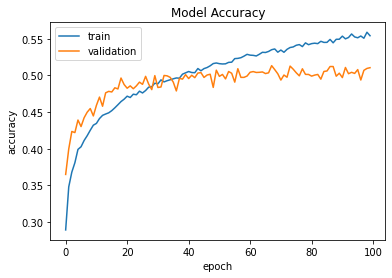

In [8]:
score=model.evaluate(X_test,y_test,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

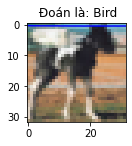

In [12]:

plt.subplot(212)
plt.title('Val Accuracy')
plt.plot(history.history['val_accuracy'], color='blue',label='train')
Label = ['Airplane', 'Automobile', 'Bird', 'Cat',
'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
test = 1201
plt.title(" Đoán là: " +
str(Label[np.argmax(model.predict(X[test].reshape(-1,3072)))]))
y_test[test]
plt.imshow(X[test],
cmap=plt.get_cmap('gray'))

tien doan: Ship


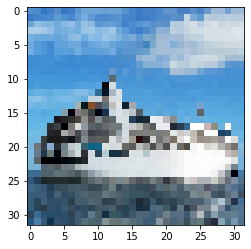

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
url = '/content/ship.jpg'
img=load_img(url,target_size=(32,32))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(-1,3072)
img=img.astype('float32')
img=img/255
A = np.argmax(model.predict(img),axis=1)
print("tien doan:",Label[int(A)])